**Name Israr Ahmed**

# Dataset_link

Link to dataset: https://drive.google.com/drive/folders/1WtgN1akdxNsAIBQrO38vqKvzQh0mQ-OL?usp=sharing

# Classifier

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


class Classifier:

  def SVM(self, train_data, train_labels, test_data, test_labels):
    svm_classifier = SVC(kernel='linear', C=1.0,)
    svm_classifier.fit(train_data, train_labels)

    # Evaluate the SVM classifier on the testing data
    preds = svm_classifier.predict(test_data)
    metrices = self.calculate_metrics(test_labels, preds)
    return svm_classifier, metrices

  def Random_Forest(self, train_data, train_labels, test_data, test_labels):
    # Train a Random Forest classifier on the training data
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
    rf_classifier.fit(train_data, train_labels)

    # Evaluate the Random Forest classifier on the testing data
    preds = rf_classifier.predict(test_data)
    metrices = self.calculate_metrics(test_labels, preds)
    return rf_classifier, metrices

  def calculate_metrics(self, y_true, y_pred):
      # Calculate confusion matrix
      confusion = confusion_matrix(y_true, y_pred)

      # Calculate true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class
      tp = {}
      fp = {}
      tn = {}
      fn = {}

      for i in range(confusion.shape[0]):
          tp[i] = confusion[i, i]
          fp[i] = confusion[:, i].sum() - tp[i]
          fn[i] = confusion[i, :].sum() - tp[i]
          tn[i] = confusion.sum() - tp[i] - fp[i] - fn[i]

      f1score = f1_score(y_true, y_pred, average='weighted')

      acc = accuracy_score(y_true, y_pred)

      # Add metrics to dictionary
      metrics_dict = {'f1-score': f1score, 'accuracy':acc, 'tp': tp, 'fp': fp}

      return metrics_dict

# Feature Extractor

In [3]:
# Feature Extractor SIFT

import cv2
class FeatureExtraction:

  sift=''

  def __init__(self):
    self.sift = cv2.xfeatures2d.SIFT_create()

  def feature_extractor(self, image_path):
    img = cv2.imread(image_path)
    _, d = self.sift.detectAndCompute(img, None)
    return d

  def create_clusters(self, features, k):
    criteron = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centers = cv2.kmeans(features, k, None, criteron, 10, flags)
    return centers
  
  def bag_of_features(self, features, centers, k = 50):
    vector = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centers
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vector[0][idx] += 1
    return vector


# Dataset 1

In [19]:
import os
train_folder_path = '/content/drive/MyDrive/MSDS Semester 2/Computer Vision/Objects_Dataset_Images/train' #add path to training folder
test_folder_path = '/content/drive/MyDrive/MSDS Semester 2/Computer Vision/Objects_Dataset_Images/test' #add path to testing folder

In [20]:
# get all image paths
import glob
train_images = glob.glob(train_folder_path+"/*/*.jpg", recursive = True)
test_images = glob.glob(test_folder_path+"/*/*.jpg", recursive = True)

### Visualize some samples

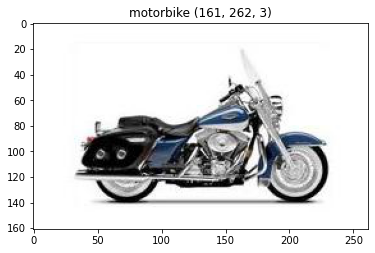

In [23]:
import matplotlib.pyplot as plt
import random

def visualize_image(image_path, title):
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.title(title+" "+str(img.shape))

#for training images
img_path = train_images[random.randint(0,len(train_images))]
#for test images
# img_path = test_images[random.randint(0,len(test_images))]
visualize_image(img_path, img_path.split('/')[8])

In [24]:
class_indices = {'Soccer_Ball': 0, 'accordion': 1, 'dollar_bill': 2, 'motorbike': 3, 'accordian': 1}

### Performing Classification

In [25]:
## Feature Extraction 
import numpy as np

feature_extractor = FeatureExtraction()

features=[]
labels=[]

for each in train_images:
  features.append(feature_extractor.feature_extractor(each))

#stacking the features for clustering
features = np.vstack(features)

#create clusters 
centers = feature_extractor.create_clusters(features, 224)

#get vectors and labels
train_features = []
train_labels = []
test_features = []
test_labels = []
for each in train_images:
  feature_matrix = feature_extractor.feature_extractor(each)
  train_features.append(feature_extractor.bag_of_features(feature_matrix, centers, 224))
  train_labels.append(class_indices.get(each.split('/')[8]))

for each in test_images:
  feature_matrix = feature_extractor.feature_extractor(each)
  test_features.append(feature_extractor.bag_of_features(feature_matrix, centers, 224))
  test_labels.append(class_indices.get(each.split('/')[8]))

train_features = np.vstack(train_features)
test_features = np.vstack(test_features)

print(f"Train Feature Shape {np.array(train_features).shape}, Train Labels Shape {np.array(train_labels).shape}")
print(f"Test Feature Shape {np.array(test_features).shape}, Test Labels Shape {np.array(test_labels).shape}")

#apply classification using RandomForest and SVM
calssifier = Classifier()
rf, accuracy_score_rf = calssifier.Random_Forest(train_features, train_labels, test_features, test_labels)
svm, accuracy_score_svm = calssifier.SVM(train_features, train_labels, test_features, test_labels)


Train Feature Shape (56, 224), Train Labels Shape (56,)
Test Feature Shape (8, 224), Test Labels Shape (8,)


In [26]:
#results
print(f"Score for Random Forest {accuracy_score_rf}")
print(f"Score for SVM {accuracy_score_svm}")

Score for Random Forest {'f1-score': 0.8666666666666667, 'accuracy': 0.875, 'tp': {0: 2, 1: 1, 2: 2, 3: 2}, 'fp': {0: 0, 1: 0, 2: 1, 3: 0}}
Score for SVM {'f1-score': 0.8666666666666667, 'accuracy': 0.875, 'tp': {0: 2, 1: 1, 2: 2, 3: 2}, 'fp': {0: 1, 1: 0, 2: 0, 3: 0}}


Random Forest Predictions


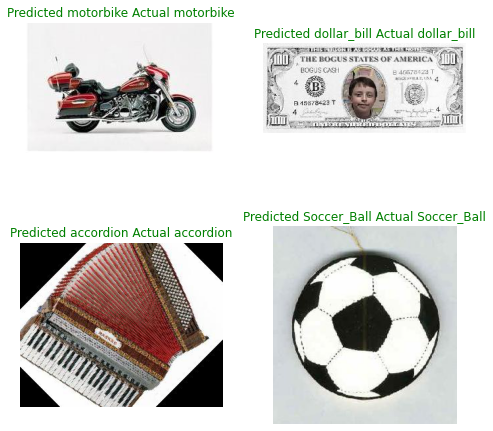

In [27]:
random.shuffle(test_images)
rf_preds = []
svm_preds = []
labels = []
testing_images = []
for each in test_images[:4]:
  testing_images.append(plt.imread(each))
  feature_matrix = feature_extractor.feature_extractor(each)
  #with random forest
  rf_preds.append(rf.predict(feature_extractor.bag_of_features(feature_matrix, centers, 224)))
  #with svm
  svm_preds.append(svm.predict(feature_extractor.bag_of_features(feature_matrix, centers, 224)))
  labels.append(class_indices.get(each.split('/')[8]))


print("Random Forest Predictions")
plt.figure(figsize=(8,8))
for i in range(len(testing_images)):
  plt.subplot(2,2,i+1)
  plt.imshow(testing_images[i])
  color = 'green' if labels[i] == rf_preds[i] else "red"
  plt.title("Predicted "+list(class_indices.keys())[int(rf_preds[i])]+" Actual "+list(class_indices.keys())[int(labels[i])], color = color)
  plt.axis('off')


SVM Predictions


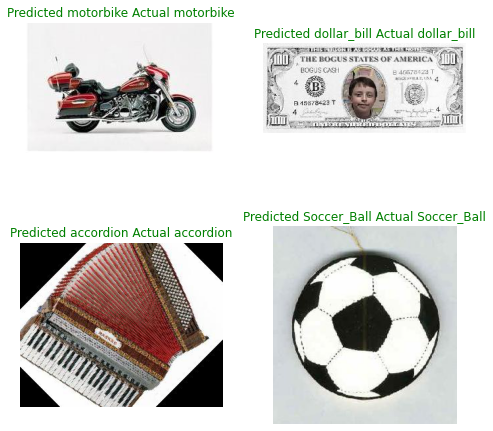

In [28]:
print("SVM Predictions")
plt.figure(figsize=(8,8))
for i in range(len(testing_images)):
  plt.subplot(2,2,i+1)
  plt.imshow(testing_images[i])
  color = 'green' if labels[i] == svm_preds[i] else "red"
  plt.title("Predicted "+list(class_indices.keys())[int(svm_preds[i])]+" Actual "+list(class_indices.keys())[int(labels[i])], color = color)
  plt.axis('off')


# Dataset 02

In [5]:
import os
images_folder_path = '/content/flower_photos' #add path to images folder

In [6]:
# get all image paths
import glob
images = glob.glob(images_folder_path+"/*/*.jpg", recursive = True)
print(f"There are total {len(images)} images in this dataset")

There are total 3670 images in this dataset


In [7]:
class_indices = {'daisy':0, 'dandelion':1, 'roses':2, 'sunflowers':3, 'tulips':4}

### Visualize some samples

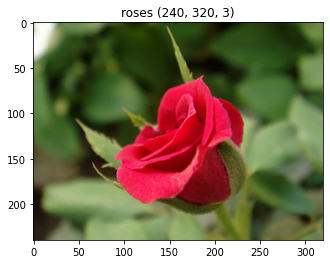

In [10]:
import matplotlib.pyplot as plt
import random

def visualize_image(image_path, title):
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.title(title+" "+str(img.shape))

#for training images
img_path = images[random.randint(0,len(images))]
#for test images
# img_path = test_images[random.randint(0,len(test_images))]
visualize_image(img_path, img_path.split('/')[3])

### Performing Classification

In [13]:
## Feature Extraction 
import numpy as np
from sklearn.model_selection import train_test_split

feature_extractor = FeatureExtraction()

features=[]
labels=[]

for each in images:
  features.append(feature_extractor.feature_extractor(each))

#stacking the features for clustering
features = np.vstack(features)

#create clusters 
centers = feature_extractor.create_clusters(features, 25)

#get vectors and labels
features = []
labels = []
test_features = []
test_labels = []
for each in images:
  feature_matrix = feature_extractor.feature_extractor(each)
  features.append(feature_extractor.bag_of_features(feature_matrix, centers, 25))
  labels.append(class_indices.get(each.split('/')[3]))

features = np.vstack(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=54)


print(f"Train Feature Shape {np.array(train_features).shape}, Train Labels Shape {np.array(train_labels).shape}")
print(f"Test Feature Shape {np.array(test_features).shape}, Test Labels Shape {np.array(test_labels).shape}")

#apply classification using RandomForest and SVM
calssifier = Classifier()
rf, accuracy_score_rf = calssifier.Random_Forest(train_features, train_labels, test_features, test_labels)
svm, accuracy_score_svm = calssifier.SVM(train_features, train_labels, test_features, test_labels)


Train Feature Shape (2936, 25), Train Labels Shape (2936,)
Test Feature Shape (734, 25), Test Labels Shape (734,)


In [18]:
#results
print(f"Score for Random Forest {accuracy_score_rf}")
print(f"Score for SVM {accuracy_score_svm}")

Score for Random Forest {'f1-score': 0.47159588017530985, 'accuracy': 0.4782016348773842, 'tp': {0: 47, 1: 123, 2: 44, 3: 68, 4: 69}, 'fp': {0: 52, 1: 104, 2: 61, 3: 64, 4: 102}}
Score for SVM {'f1-score': 0.4570058089667892, 'accuracy': 0.46866485013623976, 'tp': {0: 46, 1: 134, 2: 38, 3: 71, 4: 55}, 'fp': {0: 44, 1: 150, 2: 52, 3: 47, 4: 97}}


Random Forest Predictions


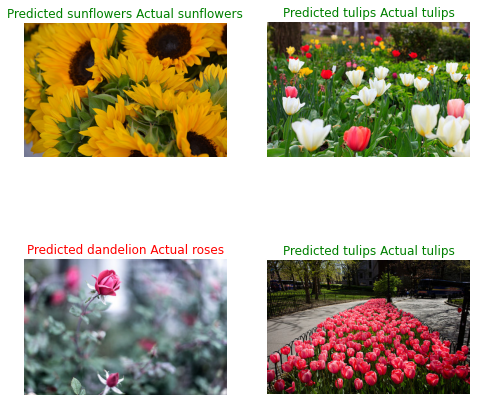

In [16]:
random.shuffle(images)
rf_preds = []
svm_preds = []
labels = []
testing_images = []
for each in images[:4]:
  testing_images.append(plt.imread(each))
  feature_matrix = feature_extractor.feature_extractor(each)
  #with random forest
  rf_preds.append(rf.predict(feature_extractor.bag_of_features(feature_matrix, centers, 25)))
  #with svm
  svm_preds.append(svm.predict(feature_extractor.bag_of_features(feature_matrix, centers, 25)))
  labels.append(class_indices.get(each.split('/')[3]))


print("Random Forest Predictions")
plt.figure(figsize=(8,8))
for i in range(len(testing_images)):
  plt.subplot(2,2,i+1)
  plt.imshow(testing_images[i])
  color = 'green' if labels[i] == rf_preds[i] else "red"
  plt.title("Predicted "+list(class_indices.keys())[int(rf_preds[i])]+" Actual "+list(class_indices.keys())[int(labels[i])], color = color)
  plt.axis('off')


SVM Predictions


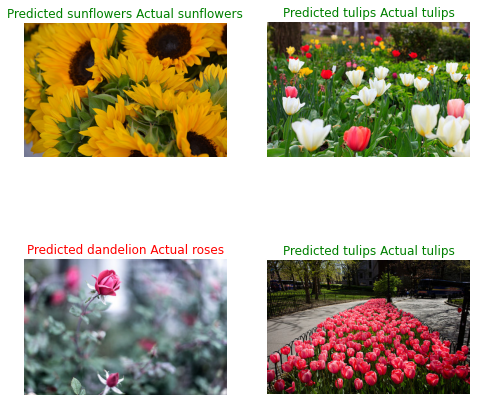

In [17]:
print("SVM Predictions")
plt.figure(figsize=(8,8))
for i in range(len(testing_images)):
  plt.subplot(2,2,i+1)
  plt.imshow(testing_images[i])
  color = 'green' if labels[i] == svm_preds[i] else "red"
  plt.title("Predicted "+list(class_indices.keys())[int(svm_preds[i])]+" Actual "+list(class_indices.keys())[int(labels[i])], color = color)
  plt.axis('off')
